In [1]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

In [2]:
import pandas as pd
from sklearn import preprocessing
d2 = pd.read_pickle('d2.pkl')
d2.info()
X= np.array(d2.iloc[:,5:])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [3]:
#X = df.iloc[:,2:].values
#X = df.values

X = preprocessing.scale(X)
type(X)

numpy.ndarray

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=58)
X_r = pca.fit(X).transform(X)
sum(pca.explained_variance_ratio_)
#X = X_r

0.89985043519633756

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.153335661629 
The Calinski Harabasz score is : 80.8976845379


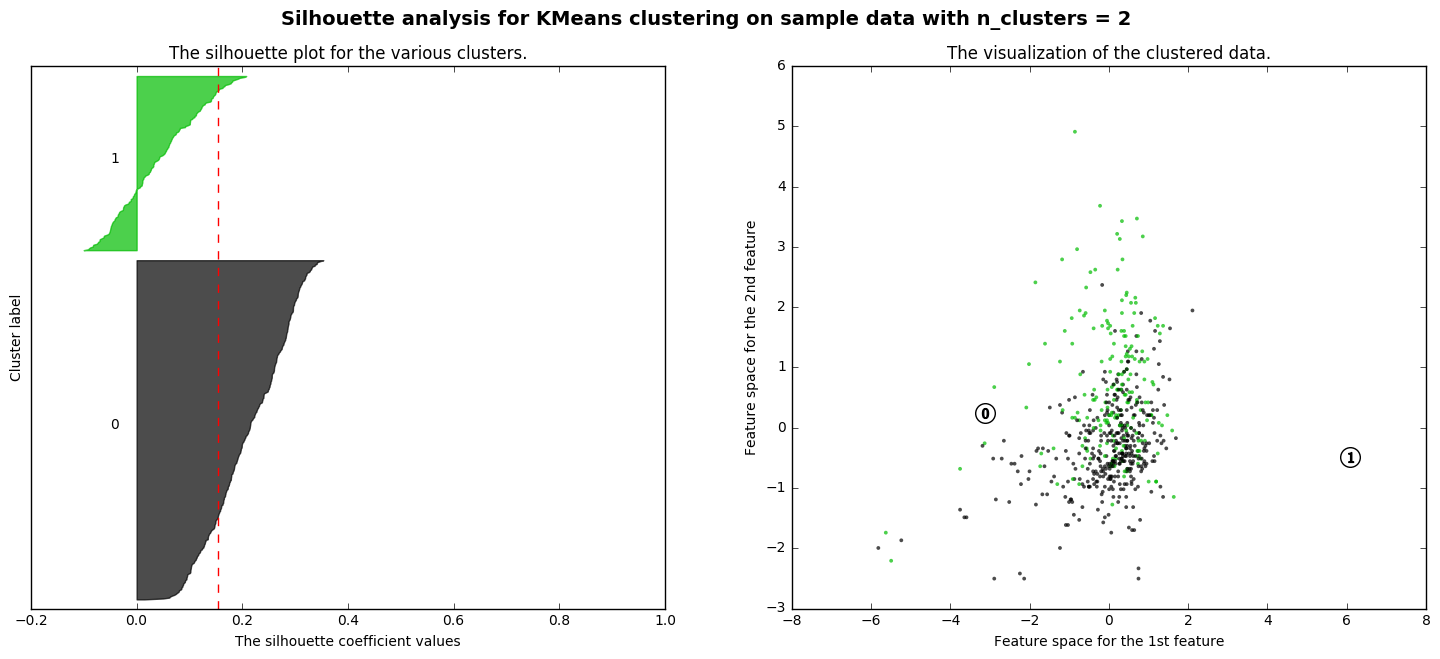

For n_clusters = 3 The average silhouette_score is : 0.106125743172 
The Calinski Harabasz score is : 66.7847352297


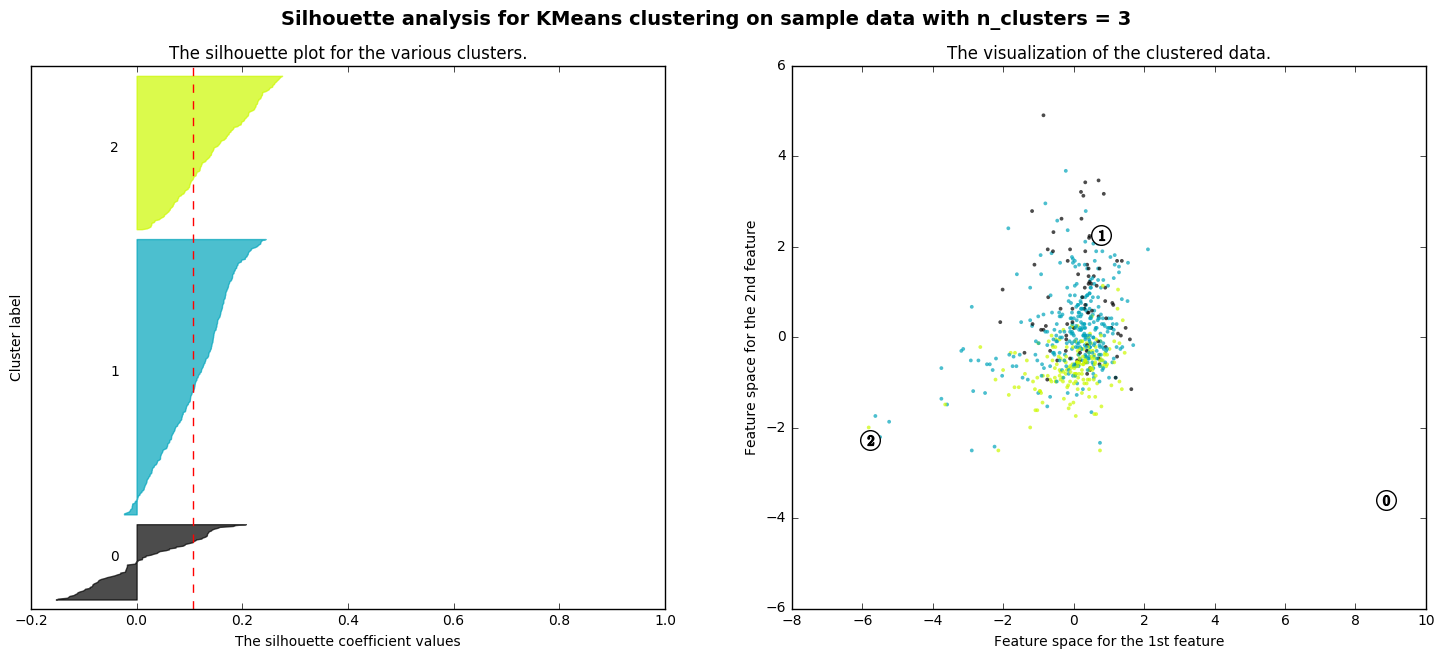

For n_clusters = 5 The average silhouette_score is : 0.0669995366802 
The Calinski Harabasz score is : 49.0609681187


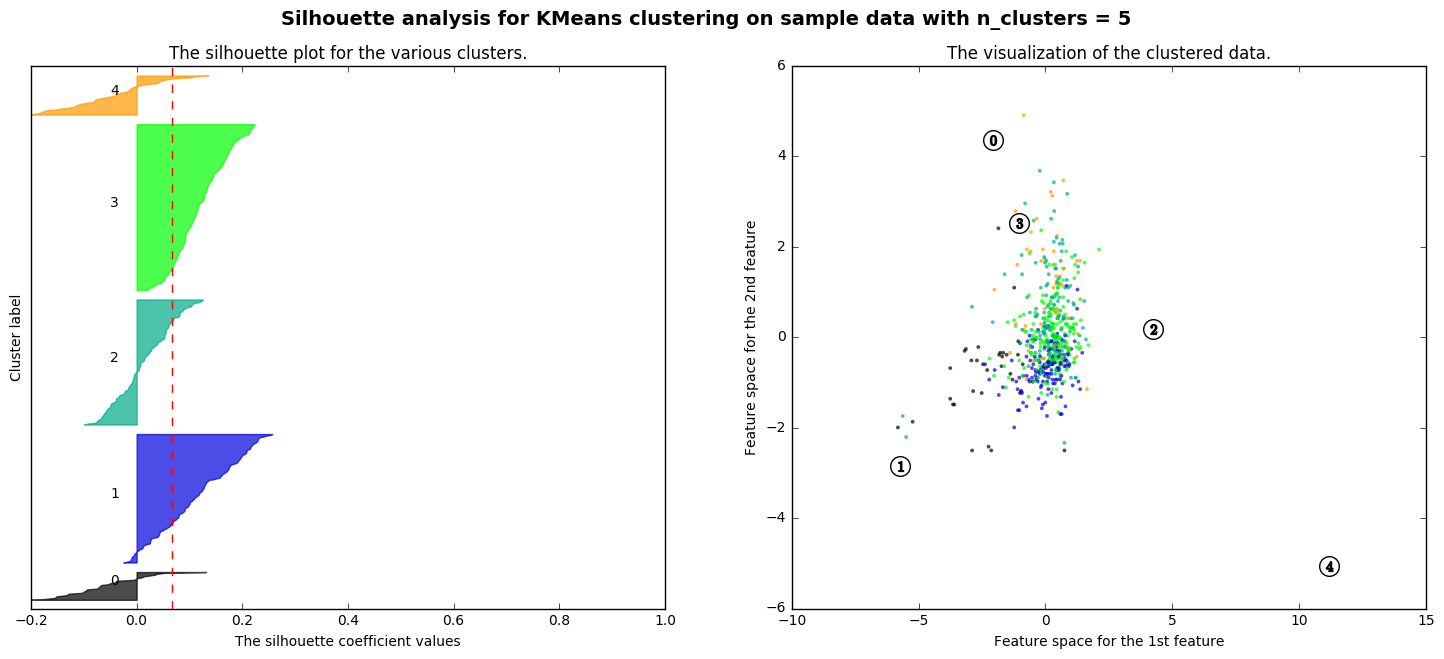

For n_clusters = 7 The average silhouette_score is : 0.0778643145382 
The Calinski Harabasz score is : 39.4720097197


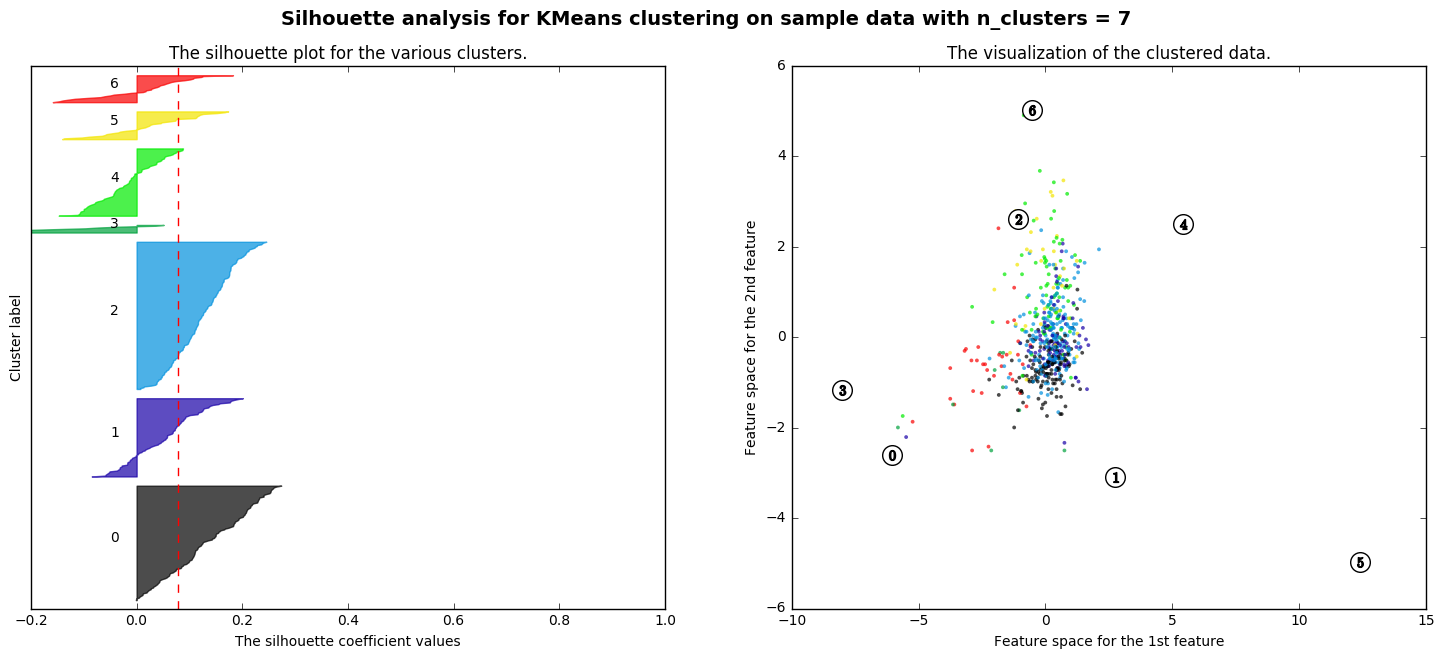

In [5]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 5,  7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#    cluster_labels = clusterer.fit_predict(X)
    cluster_labels = clusterer.fit_predict(X_r)
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
    ch_score = calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    
    

In [ ]:
for i in zip(d2['city_town'],cluster_labels):
    print(i)

In [6]:
Xclus = pd.DataFrame(X)
Xclus['cluster'] = cluster_labels
Xclus.to_pickle('Xclus.pkl')
Xclus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 155 entries, 0 to cluster
dtypes: float64(154), int32(1)
memory usage: 682.1 KB


In [22]:
features = d2.columns[5:]
features

Index(['p_in_lab', 'p_unemployed', 'p_fem_labforce', 'p_fem_employed',
       'p_ch6_paremp', 'p_com_car', 'p_com_carpool', 'p_com_transit',
       'p_com_walk', 'p_com_other',
       ...
       'CYCountyEQTaxRate', 'CYSchoolEQTaxRate',
       'CYLocalPurposeMunicipalEQTaxRate', 'CYTotalMunicipalEQRate',
       'CYTotalEQRate(REAPNotIncluded)', 'num_badge', 'num_train_stat',
       'management_rate', 'teacher_rate', 'developer_rate'],
      dtype='object', length=154)

In [23]:
Yclus = Xclus.groupby('cluster').median().T
Yclus['features'] = features
Yclus.set_index('features',inplace=True)
Yclus.index

Index(['p_in_lab', 'p_unemployed', 'p_fem_labforce', 'p_fem_employed',
       'p_ch6_paremp', 'p_com_car', 'p_com_carpool', 'p_com_transit',
       'p_com_walk', 'p_com_other',
       ...
       'CYCountyEQTaxRate', 'CYSchoolEQTaxRate',
       'CYLocalPurposeMunicipalEQTaxRate', 'CYTotalMunicipalEQRate',
       'CYTotalEQRate(REAPNotIncluded)', 'num_badge', 'num_train_stat',
       'management_rate', 'teacher_rate', 'developer_rate'],
      dtype='object', name='features', length=154)

In [35]:
influence = Yclus.std(1).sort_values(ascending=False)
influence
high_inf = influence.index[:30]

In [36]:
d2

,town,county,state,FIPS,city_town,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,...,CYCountyEQTaxRate,CYSchoolEQTaxRate,CYLocalPurposeMunicipalEQTaxRate,CYTotalMunicipalEQRate,CYTotalEQRate(REAPNotIncluded),num_badge,num_train_stat,management_rate,teacher_rate,developer_rate
0,Absecon city,Atlantic County,New Jersey,3400100100,"Absecon city, Atlantic County, New Jersey",67.3,7.0,61.1,54.9,78.2,...,0.463,1.444,0.945,0.978,2.885,0.0,1.0,2.279898,0.727648,0.997808
1,Atlantic City city,Atlantic County,New Jersey,3400102080,"Atlantic City city, Atlantic County, New Jersey",60.4,10.5,57.6,48.1,61.6,...,0.336,1.084,1.528,1.573,2.993,2.0,1.0,2.698644,0.359848,0.359848
2,Brigantine city,Atlantic County,New Jersey,3400107810,"Brigantine city, Atlantic County, New Jersey",61.4,5.5,57.0,52.8,92.3,...,0.509,0.492,0.671,0.671,1.672,2.0,0.0,1.021209,0.000000,0.000000
3,Buena borough,Atlantic County,New Jersey,3400108680,"Buena borough, Atlantic County, New Jersey",68.4,12.5,61.1,55.2,74.7,...,0.502,1.550,1.055,1.055,3.107,1.0,0.0,1.523245,0.335447,0.000000
4,Buena Vista township,Atlantic County,New Jersey,3400108710,"Buena Vista township, Atlantic County, New Jersey",63.0,9.8,61.6,52.8,60.0,...,0.489,1.558,0.419,0.419,2.466,3.0,0.0,0.000000,0.000000,0.000000
5,Corbin City city,Atlantic County,New Jersey,3400115160,"Corbin City city, Atlantic County, New Jersey",67.4,7.7,70.8,69.5,71.4,...,0.508,1.013,0.249,0.249,1.770,0.0,0.0,1.364931,0.000000,0.000000
6,Egg Harbor township,Atlantic County,New Jersey,3400120290,"Egg Harbor township, Atlantic County, New Jersey",74.5,9.7,69.7,60.9,68.1,...,0.491,1.863,0.518,0.537,2.891,0.0,0.0,2.123534,0.248074,0.248074
7,Egg Harbor City city,Atlantic County,New Jersey,3400120350,"Egg Harbor City city, Atlantic County, New Jersey",72.2,13.4,67.2,51.7,75.5,...,0.453,1.869,1.800,1.800,4.122,2.0,1.0,2.110149,0.000000,0.000000
8,Estell Manor city,Atlantic County,New Jersey,3400121870,"Estell Manor city, Atlantic County, New Jersey",71.0,8.9,66.3,58.3,80.3,...,0.489,1.421,0.277,0.277,2.187,1.0,0.0,0.694651,0.000000,0.000000
9,Folsom borough,Atlantic County,New Jersey,3400123940,"Folsom borough, Atlantic County, New Jersey",64.6,11.5,58.9,48.1,68.1,...,0.503,1.083,0.386,0.386,1.972,1.0,0.0,2.613365,0.000000,1.835570


In [38]:
d2['cluster'] = cluster_labels
d2.to_pickle('d2Plus7clusters.pkl')
d2.info()
d3 = d2.iloc[:,5:]
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 160 entries, town to cluster
dtypes: float64(152), int32(1), int64(2), object(5)
memory usage: 708.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 155 entries, p_in_lab to cluster
dtypes: float64(152), int32(1), int64(2)
memory usage: 686.4 KB


In [39]:
D3clus = Xclus.groupby('cluster').median().T
D3clus['features'] = features
D3clus.set_index('features',inplace=True)
D3clus.index

Index(['p_in_lab', 'p_unemployed', 'p_fem_labforce', 'p_fem_employed',
       'p_ch6_paremp', 'p_com_car', 'p_com_carpool', 'p_com_transit',
       'p_com_walk', 'p_com_other',
       ...
       'CYCountyEQTaxRate', 'CYSchoolEQTaxRate',
       'CYLocalPurposeMunicipalEQTaxRate', 'CYTotalMunicipalEQRate',
       'CYTotalEQRate(REAPNotIncluded)', 'num_badge', 'num_train_stat',
       'management_rate', 'teacher_rate', 'developer_rate'],
      dtype='object', name='features', length=154)

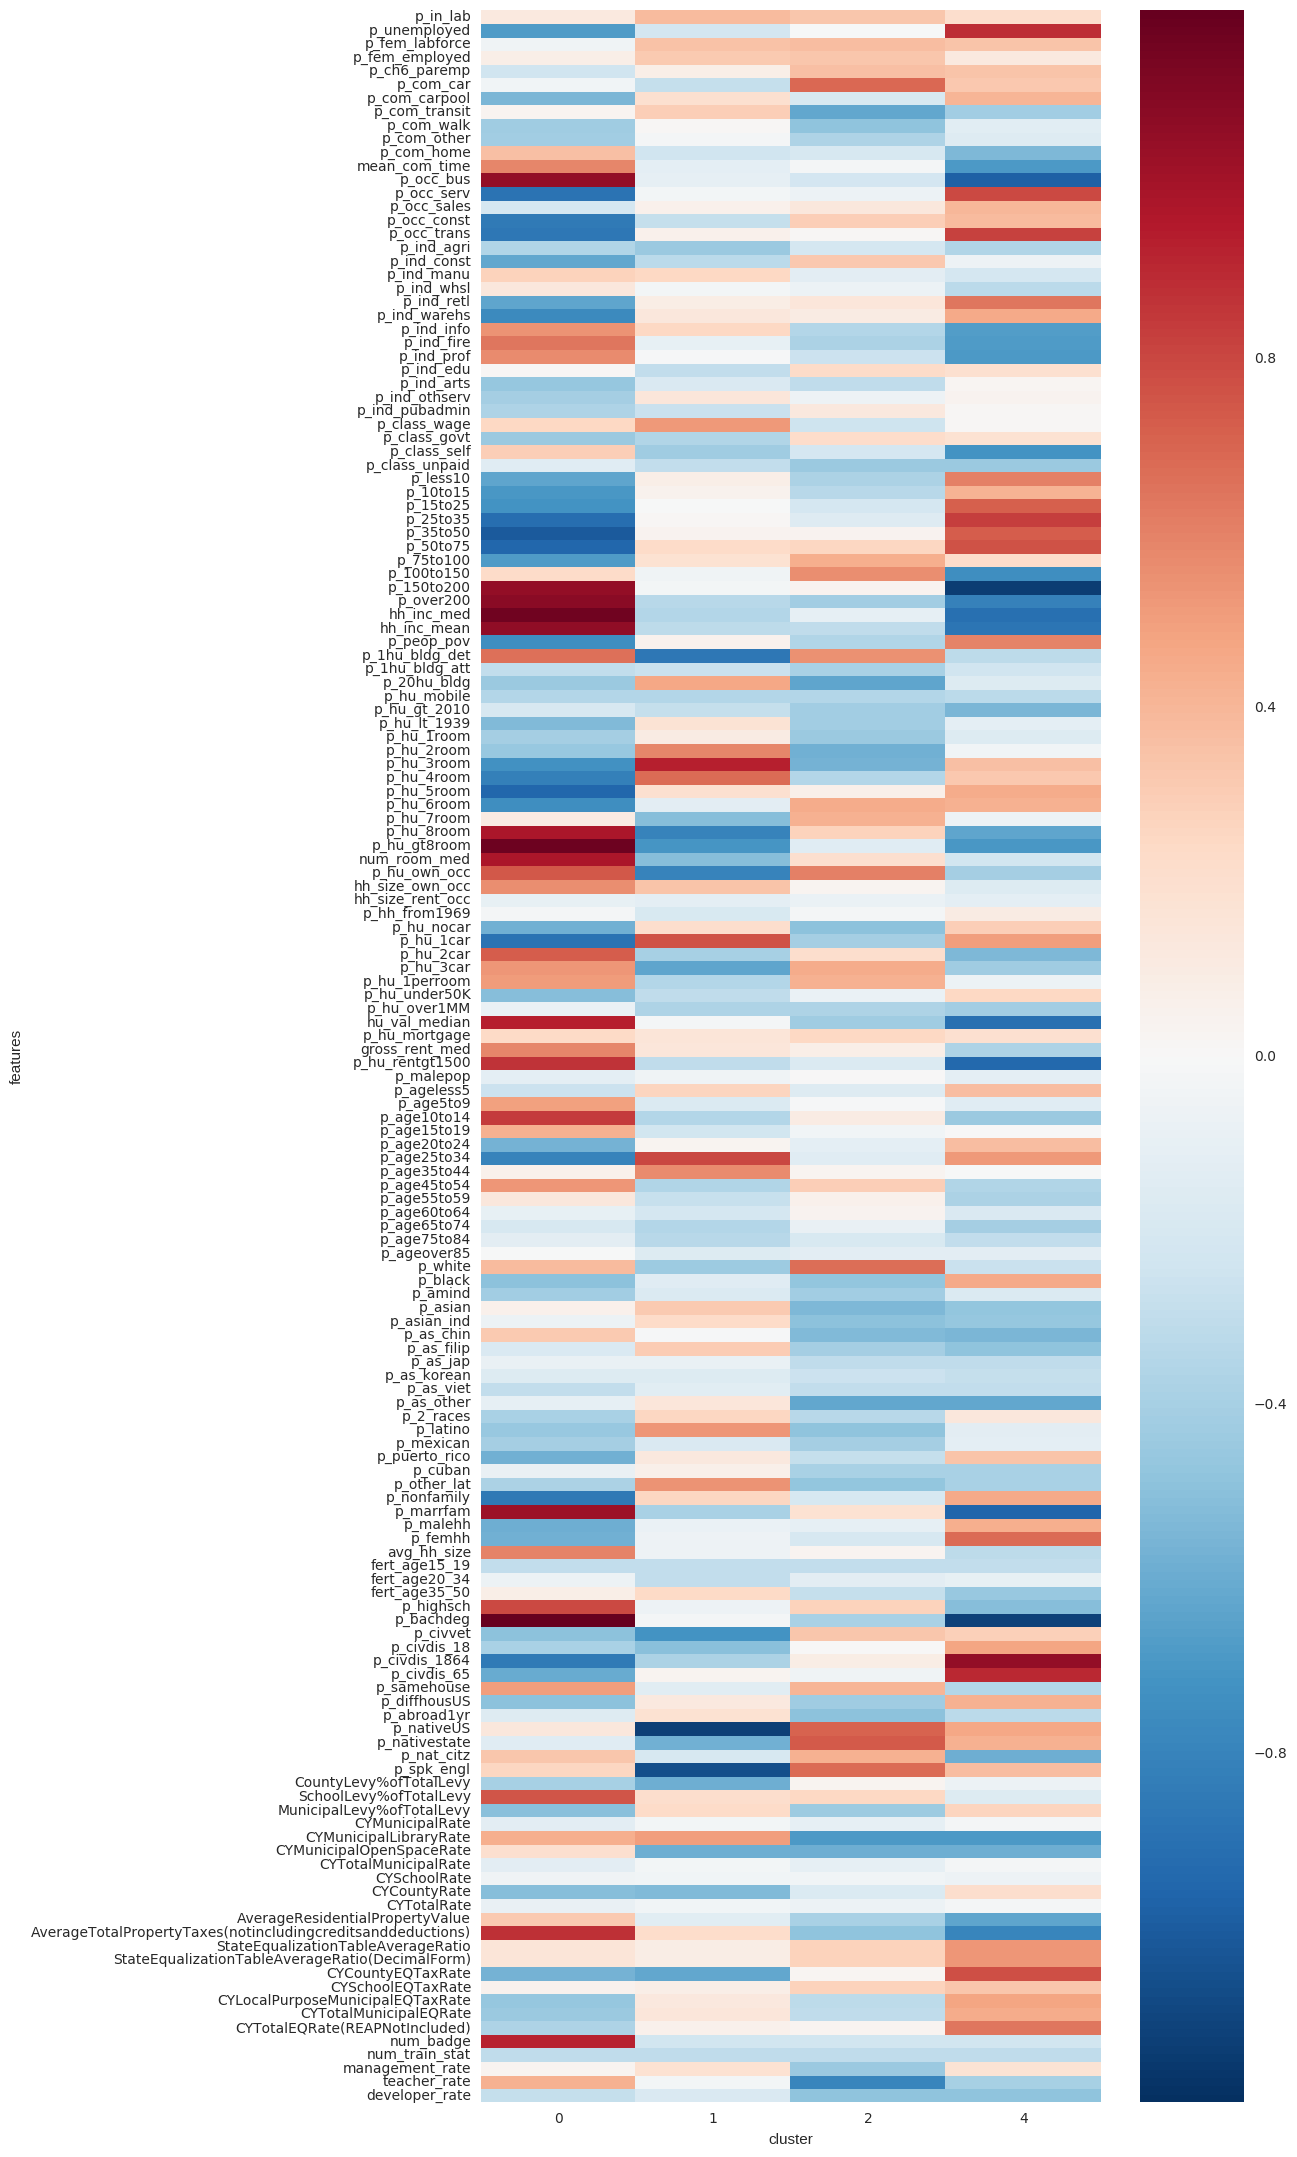

In [58]:
import seaborn as sb
plt.figure(figsize = (10,27))
sb.heatmap(D3clus.loc[:,[0,1,2,4]])  

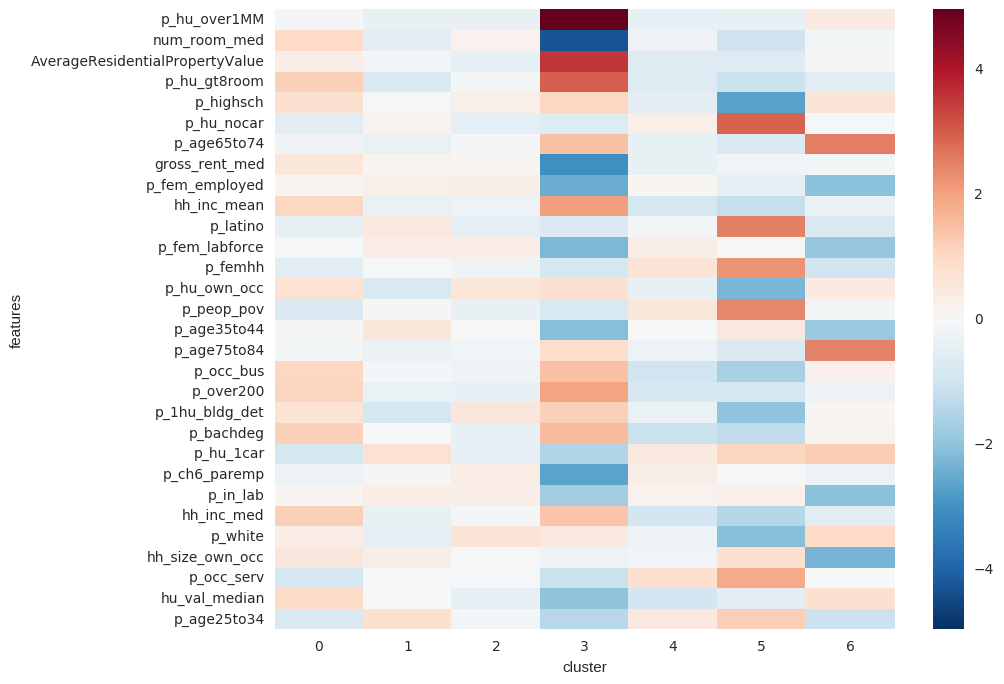

In [57]:
plt.figure(figsize = (10,8))
sb.heatmap(D3clus.loc[high_inf,:]) 

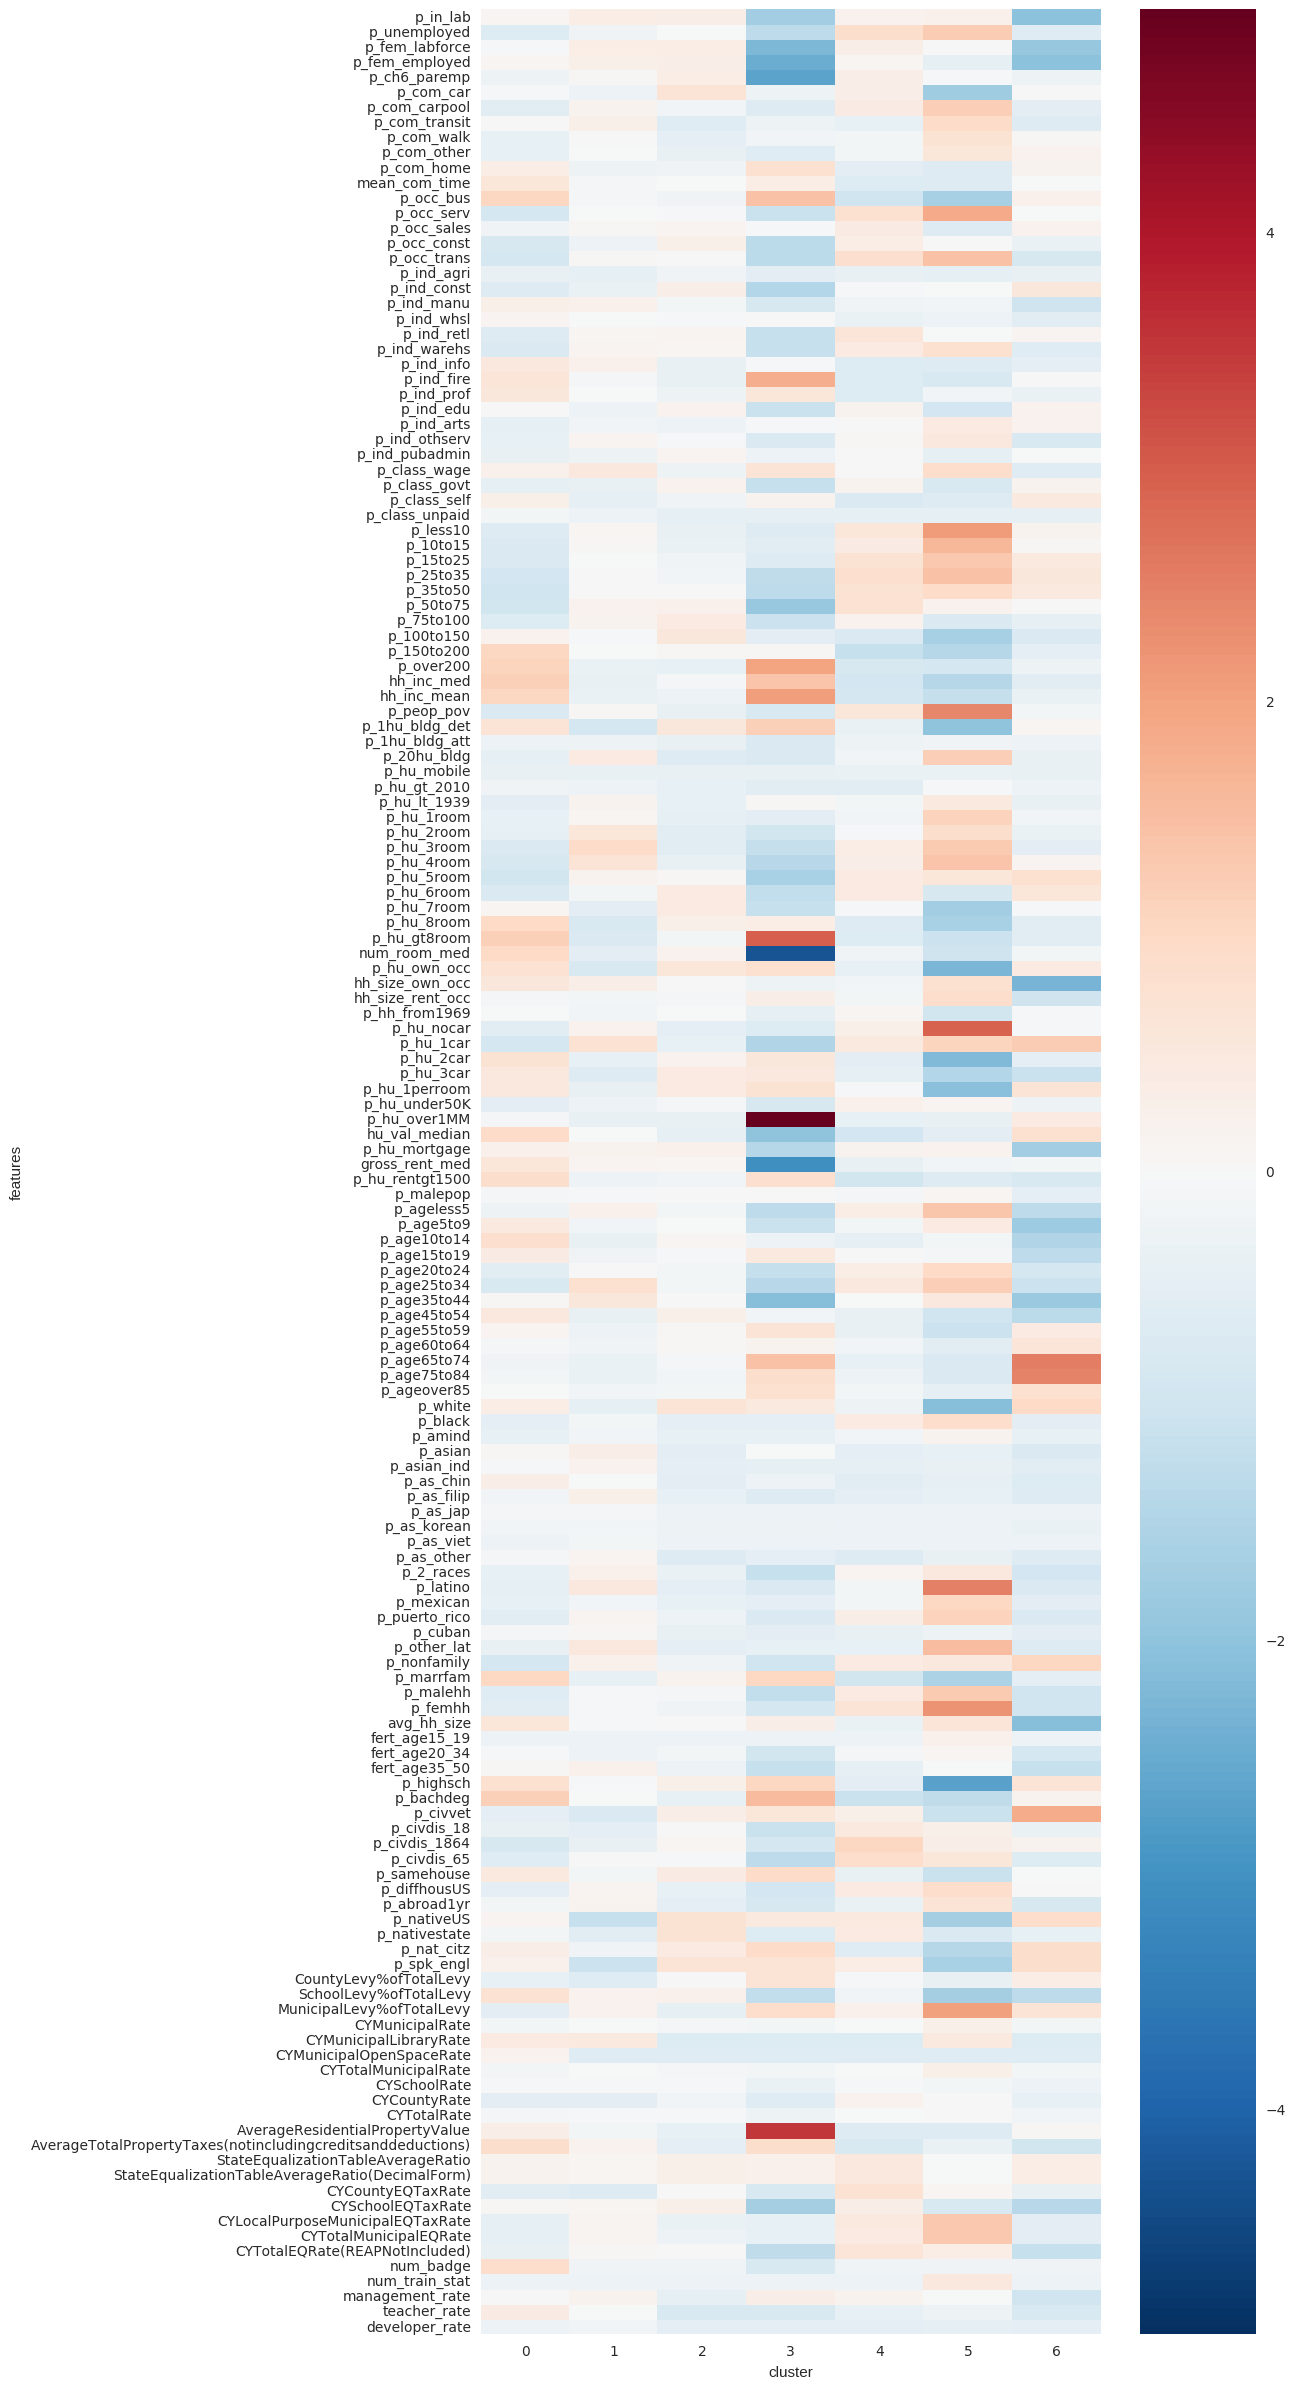

In [59]:
plt.figure(figsize = (10,30))
sb.heatmap(D3clus.loc[:,:]) 

In [50]:
!ls *.tsv

clusters2.tsv	clustersPCA7.tsv  econ.tsv	     p_peop_pov.tsv
clusters7.tsv	clustersPCA.tsv   mean_com_time.tsv  p_white.tsv
clustersAP.tsv	connclus7.tsv	  povall.tsv


In [51]:
df_to_d3 = d2.loc[:,'FIPS':'city_town'] 
df_to_d3['cluster'] = cluster_labels
df_to_d3.columns = ['id','name','cluster']
#cluster_labels]])
df_to_d3.head()
df_to_d3.to_csv('PCAclus.tsv',sep = '\t', index = False)

In [52]:
d2.groupby(['cluster']).count()

,town,county,state,FIPS,city_town,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,...,CYCountyEQTaxRate,CYSchoolEQTaxRate,CYLocalPurposeMunicipalEQTaxRate,CYTotalMunicipalEQRate,CYTotalEQRate(REAPNotIncluded),num_badge,num_train_stat,management_rate,teacher_rate,developer_rate
cluster,,,,,,,,,,,,,,,,,,,,,
0,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
1,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
2,176,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176
3,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
5,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
6,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
